Agatha Justina Majcher  
M.Sc. Renewable Energy Systems

# Distributional Analysis of the Carbon Tax in South Africa

# Analysis of all scenarios

n0 - base IRP 2019 with max 275 MtCo2

n1 - with additional investment add_carbontax_constraint and max 275 MtCO2 - NOT USED!

n2 - with additional investment add_carbontax_constraint2 (not annualized) and max 275 MtCO2
(test)

n3 - with emission prices (30 USD/tCO2) -> opt Ep



val-2Gt-IRP_27-supply_redz_lcopt_Co2L

val-2Gt-IRP_27-supply_redz_lcopt_Co2L-Ep

# 1. Setup

In [1]:
import sys
sys.path.append("~/Desktop/pypsa-za-master")

In [2]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("bmh")
%matplotlib inline

In [3]:
import pandas as pd
import geopandas as gpd
import numpy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch
from vresutils import plot as vplot
from vresutils import Dict

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# setup for plots
colors = {
    "onwind": "#77D1E4",
    "hydro": "#004F95",
    "hydro-import": "#0077AA",
    "CSP": "#FEED82",
    "solar": "#FFBB4E",
    "biomass": "#0c6013",
    "CCGT": "#CCC8C8",
    "OCGT": "#8D7867",
    "nuclear": "#C84936",
    "gas": "grey",
    "coal": "#3C3C3C",
}

nice_names = {
    'nuclear': 'Nuclear',
    'coal': 'Coal',
    'CCGT': 'CCGT',
    'OCGT': 'OCGT',
    'gas': 'Gas',
    'onwind': 'Wind',
    'hydro': 'Hydro',
    'hydro-import': 'Hydro Import',
    'solar': 'PV',
    'CSP': 'CSP',
    'biomass': 'Biomass',
}

In [ ]:
# solved_network files

n0 = pypsa.Network("~/Desktop/Final_Networks/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_base.nc")
n1 = pypsa.Network("~/Desktop/Final_Networkssolved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_EP.nc")
n2 = pypsa.Network("~/Desktop/Final_Networks/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_RE1.nc")



n3 = pypsa.Network("~/Desktop/Final_Networks/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-182H_loop.nc")



In [ ]:
#emission text

In [9]:
# Calculate emissions per generator
print("Generator power output (p):")
print(n0.generators_t.p.head())  # Print the first few rows of generator output

Generator power output (p):
Generator                   Acacia  Ankerlig      Arnot*     Arnot**  Avon  \
period timestep                                                              
2030   2030-01-03 04:00:00     0.0       0.0  268.382522  268.382522   0.0   
       2030-01-10 18:00:00     0.0       0.0  394.382522  394.382522   0.0   
       2030-01-18 08:00:00     0.0       0.0  394.382522  394.382522   0.0   
       2030-01-25 22:00:00     0.0       0.0  408.872671  408.872671   0.0   
       2030-02-02 12:00:00     0.0       0.0  467.638275  467.638275   0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW1_solar  \
period timestep                                              
2030   2030-01-03 04:00:00                       15.267064   
       2030-01-10 18:00:00                       12.553279   
       2030-01-18 08:00:00                       13.647429   
       2030-01-25 22:00:00                       13.183578   
       2030-02-02 12:00:00                       11.4

In [10]:
print("Generator efficiencies:")
print(n0.generators['efficiency'].head())  # Print the first few efficiencies


Generator efficiencies:
Generator
Arnot*      0.282486
Arnot**     0.282486
Camden*     0.265018
Camden**    0.252101
Duvha*      0.298359
Name: efficiency, dtype: float64


In [11]:
print("CO2 emissions factors per carrier:")
print(n0.generators.carrier.map(n0.carriers['co2_emissions']).head())  # Print the mapped CO2 emissions

CO2 emissions factors per carrier:
Generator
Arnot*      0.3
Arnot**     0.3
Camden*     0.3
Camden**    0.3
Duvha*      0.3
Name: carrier, dtype: float64


In [13]:
# Now calculate the emissions
emissions = n0.generators_t.p / n0.generators.efficiency * n0.generators.carrier.map(n0.carriers['co2_emissions'])

# Sum total emissions across all generators
total_emissions = emissions.sum().sum()  # This sums across time (snapshots) and across all generators

# Convert emissions to Megatonnes
total_emissions_mt = total_emissions / 1e6  # Convert emissions to Megatonnes

# Print total emissions
print(f"\033[91mTotal CO2 Emissions BEFORE reinvestment:\033[0m {total_emissions_mt} Mt")

Total CO2 Emissions BEFORE reinvestment: 0.616800542396154 Mt


In [14]:
# Now calculate the emissions
emissions = n1.generators_t.p / n1.generators.efficiency * n1.generators.carrier.map(n1.carriers['co2_emissions'])

# Sum total emissions across all generators
total_emissions = emissions.sum().sum()  # This sums across time (snapshots) and across all generators

# Convert emissions to Megatonnes
total_emissions_mt = total_emissions / 1e6  # Convert emissions to Megatonnes

# Print total emissions
print(f"\033[91mTotal CO2 Emissions BEFORE reinvestment:\033[0m {total_emissions_mt} Mt")

Total CO2 Emissions BEFORE reinvestment: 0.09236503199999997 Mt


In [15]:
# Now calculate the emissions
emissions = n2.generators_t.p / n1.generators.efficiency * n2.generators.carrier.map(n2.carriers['co2_emissions'])

# Sum total emissions across all generators
total_emissions = emissions.sum().sum()  # This sums across time (snapshots) and across all generators

# Convert emissions to Megatonnes
total_emissions_mt = total_emissions / 1e6  # Convert emissions to Megatonnes

# Print total emissions
print(f"\033[91mTotal CO2 Emissions BEFORE reinvestment:\033[0m {total_emissions_mt} Mt")

Total CO2 Emissions BEFORE reinvestment: 0.09236503199999997 Mt


In [16]:
# Now calculate the emissions
emissions = n3.generators_t.p / n3.generators.efficiency * n3.generators.carrier.map(n3.carriers['co2_emissions'])

# Sum total emissions across all generators
total_emissions = emissions.sum().sum()  # This sums across time (snapshots) and across all generators

# Convert emissions to Megatonnes
total_emissions_mt = total_emissions / 1e6  # Convert emissions to Megatonnes

# Print total emissions
print(f"\033[91mTotal CO2 Emissions BEFORE reinvestment:\033[0m {total_emissions_mt} Mt")

Total CO2 Emissions BEFORE reinvestment: 0.1316773635633203 Mt


# 2. Capacity

In [43]:
# Get capacities before optimization
capacities_before = n0.generators.groupby('carrier')['p_nom'].sum()

# Get capacities after optimization for each network
capacities_after_n0 = n0.generators.groupby('carrier')['p_nom_opt'].sum()
capacities_after_n1 = n1.generators.groupby('carrier')['p_nom_opt'].sum()
capacities_after_n2 = n2.generators.groupby('carrier')['p_nom_opt'].sum()
capacities_after_n3 = n3.generators.groupby('carrier')['p_nom_opt'].sum()

# Combine all the data into one DataFrame
all_networks_data = pd.concat(
    [capacities_before, capacities_after_n0, capacities_after_n1, capacities_after_n2, capacities_after_n3],
    axis=1,
    keys=['Before', 'n0', 'n1', 'n2', 'n3']
)
all_networks_data.columns.names = ['Capacity']

# Apply formatting to all columns except the "Before" column
formatted_networks_data = all_networks_data.applymap(lambda x: f'{x:.2f}' if x != 0 else '0.00')

# Print or display the formatted DataFrame
print(formatted_networks_data)

# Save the formatted DataFrame to a CSV file
formatted_networks_data.to_csv('formatted_generator_capacities_by_carrier.csv')




Capacity            Before           n0           n1           n2           n3
carrier                                                                       
CCGT                  0.00         0.00         0.00         0.00         0.00
CSP                 600.00       600.00       600.00       600.00       600.00
OCGT                  0.00      2704.48      1147.21      1147.21      2704.48
biomass             193.06       193.06       193.06       193.06       193.06
coal              40484.00     40484.00     40484.00     40484.00     40484.00
gas                3844.00      3844.00      3844.00      3844.00      3844.00
hydro               683.02       683.02       683.02       683.02       683.02
hydro-import       1764.00      1764.00      1764.00      1764.00      1764.00
load_shedding  27000000.00  27000000.00  27000000.00  27000000.00  27000000.00
nuclear            1854.00      1854.00      1854.00      1854.00      1854.00
onwind             5190.59     13290.59     28863.24

# 3. Generation

In [44]:
# Calculate sums for each network based on carrier
sum_n0 = n0.generators_t.p.sum().groupby(n0.generators.carrier).sum()
sum_n1 = n1.generators_t.p.sum().groupby(n1.generators.carrier).sum()
sum_n2 = n2.generators_t.p.sum().groupby(n2.generators.carrier).sum()
sum_n3 = n3.generators_t.p.sum().groupby(n3.generators.carrier).sum()

# Convert sums to DataFrames and rename columns
df_n0 = sum_n0.reset_index().rename(columns={0: 'n0'})
df_n1 = sum_n1.reset_index().rename(columns={0: 'n1'})
df_n2 = sum_n2.reset_index().rename(columns={0: 'n2'})
df_n3 = sum_n3.reset_index().rename(columns={0: 'n3'})

# Merge the DataFrames on 'carrier'
combined_df = df_n0.merge(df_n1, on='carrier').merge(df_n2, on='carrier').merge(df_n3, on='carrier')

# Sum for each column
sum_row = combined_df.sum(numeric_only=True)
sum_row['carrier'] = 'SUM'
combined_df_with_sum = combined_df.append(sum_row, ignore_index=True)

# Print the combined DataFrame with sum
print(combined_df_with_sum)

# Save the combined DataFrame to a CSV file
combined_df_with_sum.to_csv('combined_sums_with_total.csv', index=False)



          carrier            n0            n1            n2            n3
0            CCGT  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
1             CSP  1.092111e+04  1.092111e+04  1.092111e+04  1.092111e+04
2            OCGT  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
3         biomass  5.235653e+03  5.235653e+03  5.235653e+03  5.235653e+03
4            coal  6.543898e+05  1.059840e+05  1.059840e+05  1.488401e+05
5             gas  2.520000e+03  2.520000e+03  2.520000e+03  2.520000e+03
6           hydro  2.490080e+04  0.000000e+00  0.000000e+00  1.594994e+04
7    hydro-import  5.564096e+04  0.000000e+00  0.000000e+00  3.688139e+04
8   load_shedding  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
9         nuclear  7.418391e+04  4.449600e+04  4.449600e+04  6.878513e+04
10         onwind  2.459049e+05  2.755852e+05  2.861296e+05  2.358604e+05
11          solar  4.450537e+05  1.073632e+06  1.063087e+06  9.944919e+05
12            SUM  1.518751e+06  1.518

## Marginal costs

In [45]:
def print_marginal_costs(network, label):
    print(f"Marginal Costs for {label}:")
    carrier_marginal_costs = network.generators.groupby('carrier')['marginal_cost'].mean()  # Mean marginal cost per carrier
    for carrier, cost in carrier_marginal_costs.items():
        print(f"  {carrier}: {cost:.2f} ZAR")

# Check marginal costs for both networks
print_marginal_costs(n0, "Base")
print_marginal_costs(n1, "n1 (with carbon tax)")
print_marginal_costs(n2, "n2 (with with additional investment)")
print_marginal_costs(n3, "n3 (carbon tax and investment)")

Marginal Costs for Base:
  CCGT: 1136.26 ZAR
  CSP: 0.01 ZAR
  OCGT: 1730.86 ZAR
  biomass: 0.01 ZAR
  coal: 435.54 ZAR
  gas: 2755.05 ZAR
  hydro: 827.68 ZAR
  hydro-import: 1.85 ZAR
  load_shedding: 100000.01 ZAR
  nuclear: 141.79 ZAR
  onwind: 104.95 ZAR
  solar: 273.79 ZAR
Marginal Costs for n1 (with carbon tax):
  CCGT: 1136.26 ZAR
  CSP: 0.01 ZAR
  OCGT: 1730.86 ZAR
  biomass: 0.01 ZAR
  coal: 435.54 ZAR
  gas: 2755.05 ZAR
  hydro: 827.68 ZAR
  hydro-import: 1.85 ZAR
  load_shedding: 100000.01 ZAR
  nuclear: 141.79 ZAR
  onwind: 104.95 ZAR
  solar: 273.79 ZAR
Marginal Costs for n2 (with with additional investment):
  CCGT: 1331.64 ZAR
  CSP: 0.01 ZAR
  OCGT: 2035.21 ZAR
  biomass: 0.01 ZAR
  coal: 941.22 ZAR
  gas: 3046.46 ZAR
  hydro: 827.68 ZAR
  hydro-import: 1.85 ZAR
  load_shedding: 100000.01 ZAR
  nuclear: 141.79 ZAR
  onwind: 104.95 ZAR
  solar: 273.79 ZAR
Marginal Costs for n3 (carbon tax and investment):
  CCGT: 1331.64 ZAR
  CSP: 0.01 ZAR
  OCGT: 2035.21 ZAR
  biomass: 

In [19]:
def check_investments(network, label):
    print(f"Investments for {label}:")
    for carrier in ['onwind', 'solar']:
        investment = network.generators.loc[network.generators.carrier == carrier, 'p_nom_opt'].sum()
        print(f"  {carrier.capitalize()}: {investment} MW")

# Check investments for both networks
check_investments(n0, "Base")

check_investments(n3, "n1 (with additional investments)")


Investments for Base:
  Onwind: 13290.59 MW
  Solar: 41741.93126660585 MW
Investments for n1 (with additional investments):
  Onwind: 13290.59 MW
  Solar: 103284.39329047303 MW


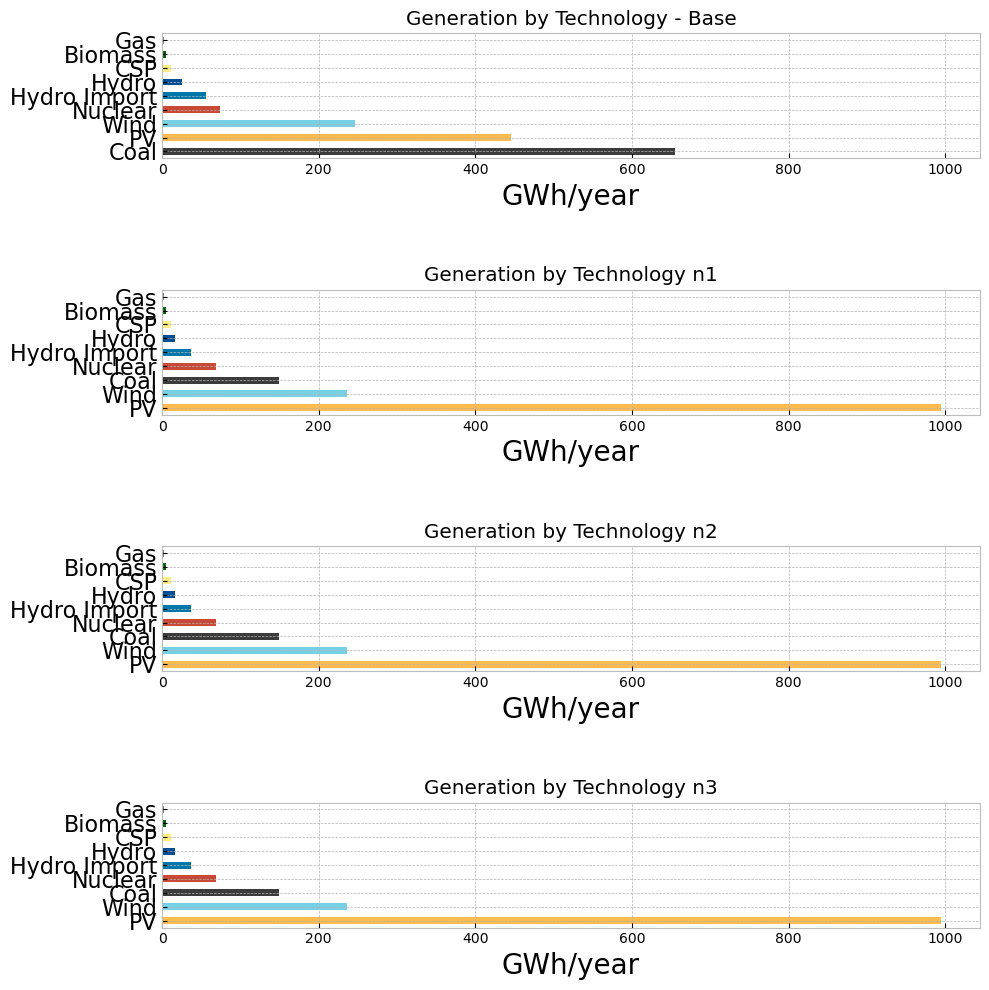

In [28]:

def plot_network_generation(network, ax, title):
    # Group by carrier and sum p_nom, divide by 1000 to convert to GW
    a = network.generators_t.p.sum().groupby(network.generators.carrier).sum().div(1e3)
    
    # Add ocgt and ccgt to gas and remove ocgt and ccgt
    a['gas'] = a.get('gas', 0) + a.get('OCGT', 0) + a.get('CCGT', 0)
    a = a.drop(['OCGT', 'CCGT'], errors='ignore')
    
    a = a[a != 0]

    carrier_order = ['onwind', 'solar', 'CSP', 'hydro', 'hydro-import', 'biomass', 'gas', 'nuclear', 'coal']
    carrier_order_filtered = [carrier for carrier in carrier_order if carrier in a.index]
    a_sorted = a.loc[carrier_order_filtered].sort_values(ascending=False)

    # Create horizontal bar chart on the given ax
    a_sorted.plot.barh(color=[colors.get(carrier, '#333333') for carrier in a_sorted.index], ax=ax)
    ax.set_xlabel('GWh/year', fontsize=20)
    ax.set_title(title)
    ax.set_facecolor('white')
    ax.set_yticklabels([nice_names.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()], fontsize=16)

    ax.set_ylabel('')  # This sets the y-axis label to an empty string

# Create a 2x1 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

plot_network_generation(n0, axes[0], 'Generation by Technology - Base')
plot_network_generation(n1, axes[1], 'Generation by Technology n1')
plot_network_generation(n2, axes[2], 'Generation by Technology n2')
plot_network_generation(n3, axes[3], 'Generation by Technology n3')

# Find the global minimum and maximum for the x-axes
min_x = min(ax.get_xlim()[0] for ax in axes.flatten())
max_x = max(ax.get_xlim()[1] for ax in axes.flatten())

# Set the x limits for all the subplots to be the same
for ax in axes.flatten():
    ax.set_xlim(min_x, max_x)

plt.tight_layout(h_pad=4.0)
plt.savefig('combined_plot.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.show()


In [ ]:
total_emissions = n.carriers['co2_emissions'].sum()


#### Generated Electricity per Day

In [36]:
# power (MWh) sum of 8760h /24 - MWh per day /1000 - GW per day
p_by_carrier_n0 = n0.generators_t.p.groupby(n0.generators.carrier, axis=1).sum()
p_by_carrier_n0 = p_by_carrier_n0.droplevel(level='period')
p_by_carrier_n0 = p_by_carrier_n0.drop(columns=["load_shedding"])

p_by_carrier_n1 = n1.generators_t.p.groupby(n1.generators.carrier, axis=1).sum()
p_by_carrier_n1 = p_by_carrier_n1.droplevel(level='period')
p_by_carrier_n1 = p_by_carrier_n1.drop(columns=["load_shedding"])

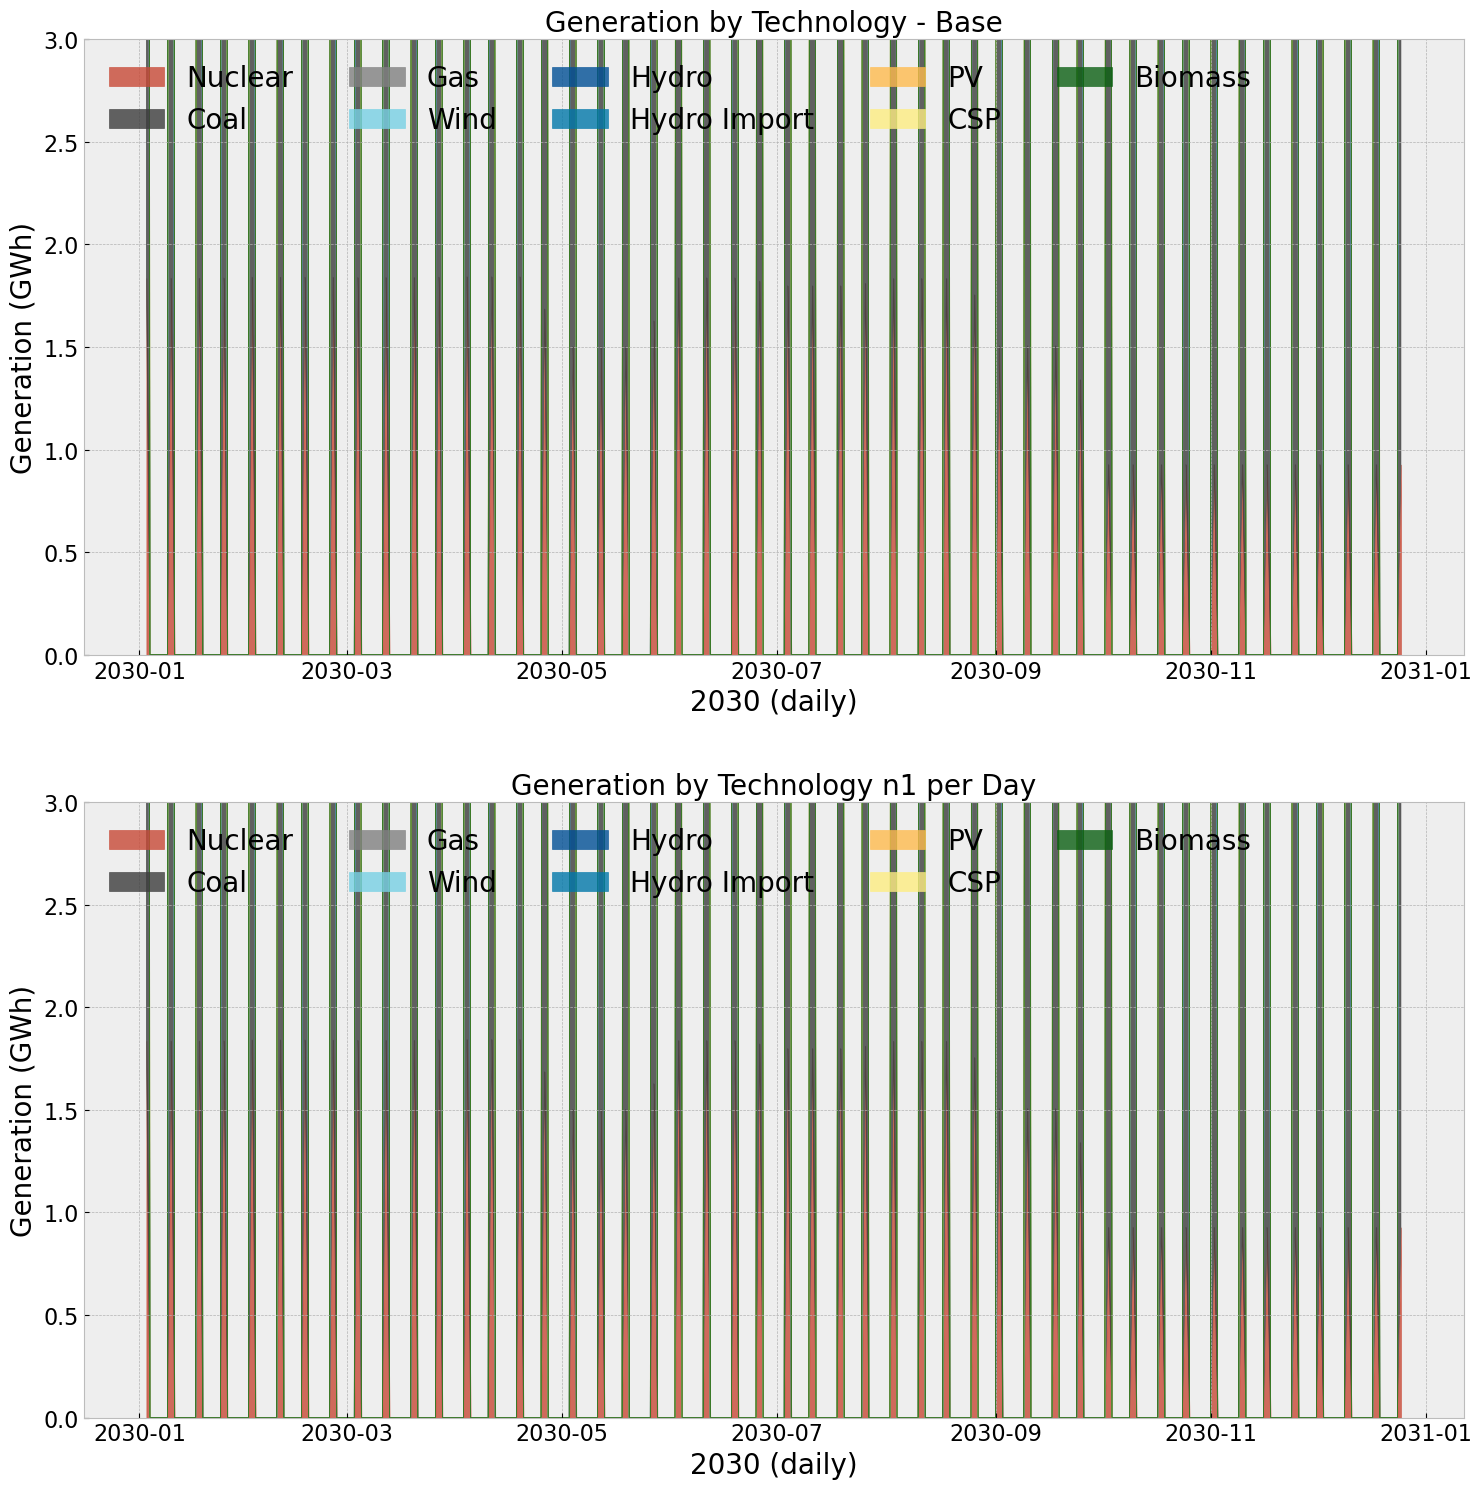

In [37]:

def plot_generation_per_day(p_by_carrier, ax, title):
    # Aggregate OCGT and CCGT into gas and remove them
    if 'OCGT' in p_by_carrier.columns:
        p_by_carrier['gas'] = p_by_carrier.get('gas', 0) + p_by_carrier['OCGT']
        p_by_carrier = p_by_carrier.drop(columns=['OCGT'])

    if 'CCGT' in p_by_carrier.columns:
        p_by_carrier['gas'] += p_by_carrier['CCGT']
        p_by_carrier = p_by_carrier.drop(columns=['CCGT'])
    
    p_by_carrier_resampled = p_by_carrier.resample("D").sum()/1e3
    stacked = p_by_carrier_resampled.stack().reset_index()
    stacked.columns = ['week', 'carrier', 'GW']
    stacked = stacked.pivot(index='week', columns='carrier', values='GW')
    bottom = 0

    for carrier in nice_names:
        if carrier in stacked.columns:
            data = stacked[carrier]
            ax.fill_between(
                data.index, bottom, bottom + data, 
                color=colors[carrier], alpha=0.8, label=nice_names[carrier]
            )
            bottom += data

    ax.legend(ncol=5, loc="upper left", frameon=False, fontsize=20)
    ax.set_xlabel("2030 (daily)", fontsize=20)
    ax.set_ylabel("Generation (GWh)", fontsize=20)
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylim(0,3)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

plot_generation_per_day(p_by_carrier_n0, axes[0], 'Generation by Technology - Base')
plot_generation_per_day(p_by_carrier_n1, axes[1], 'Generation by Technology n1 per Day')

# Set the common x limits if needed
# for ax in axes.flatten():
#     ax.set_xlim(pd.Timestamp('2030-03-29'), pd.Timestamp('2030-03-31'))

plt.tight_layout(h_pad=4.0)
plt.savefig('time_generation_combined.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.show()


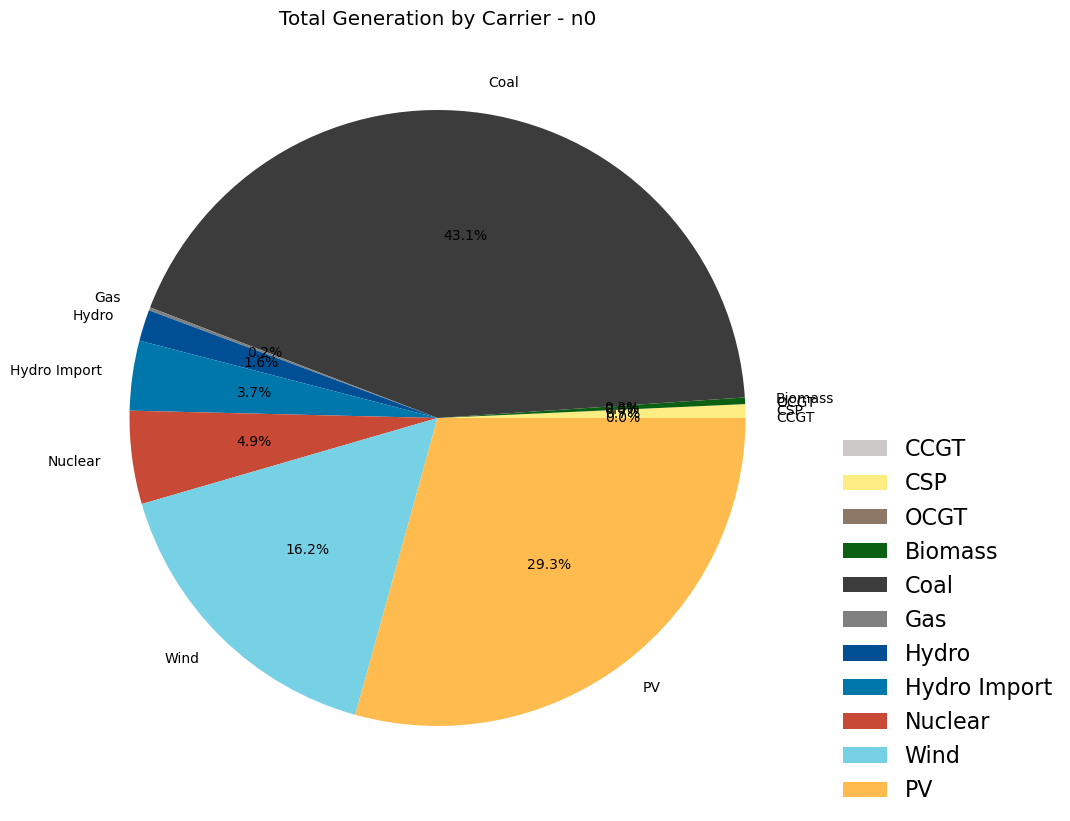

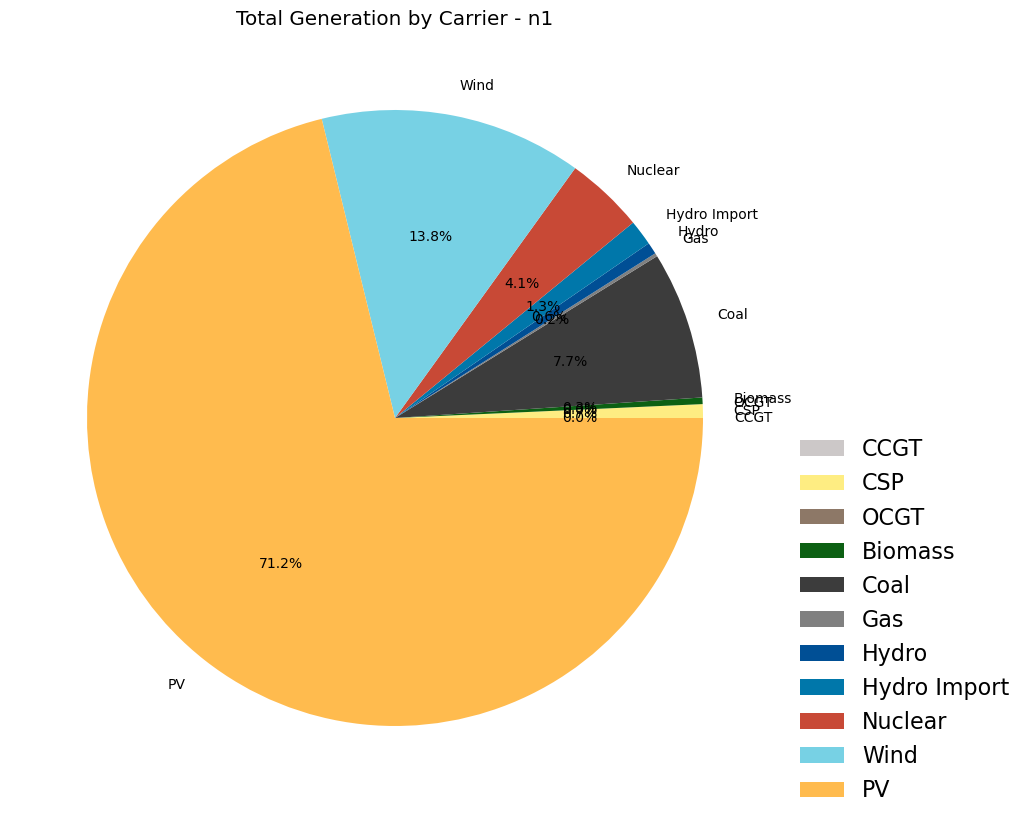

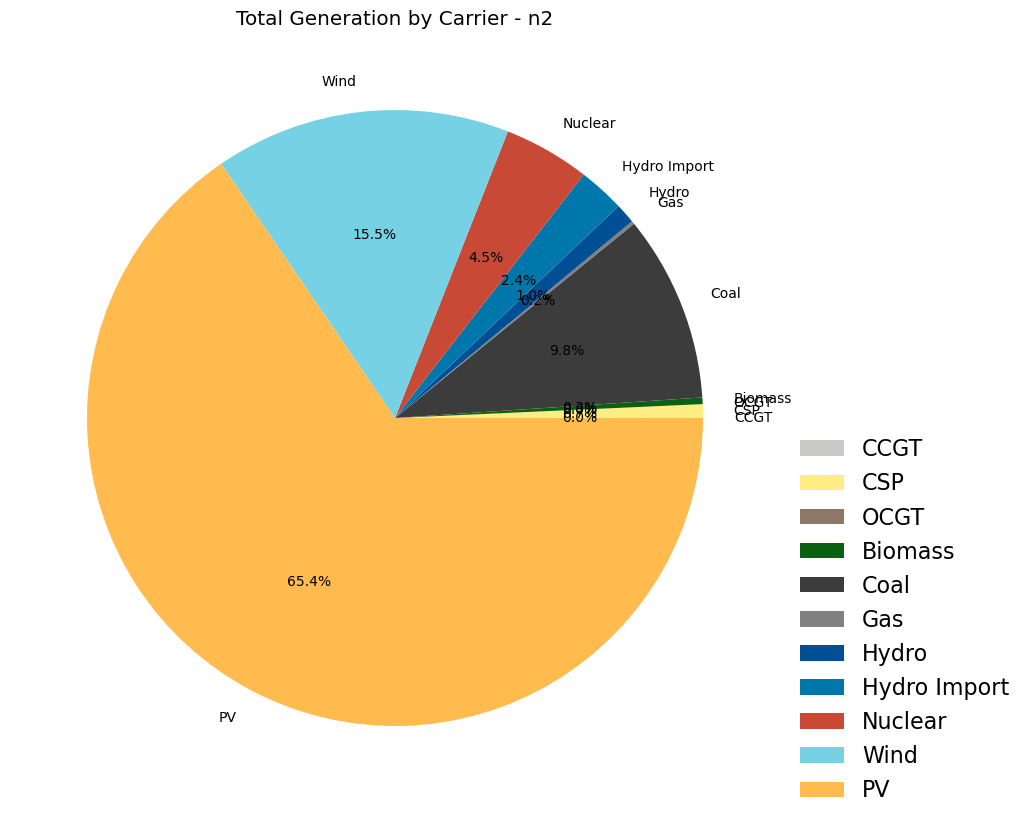

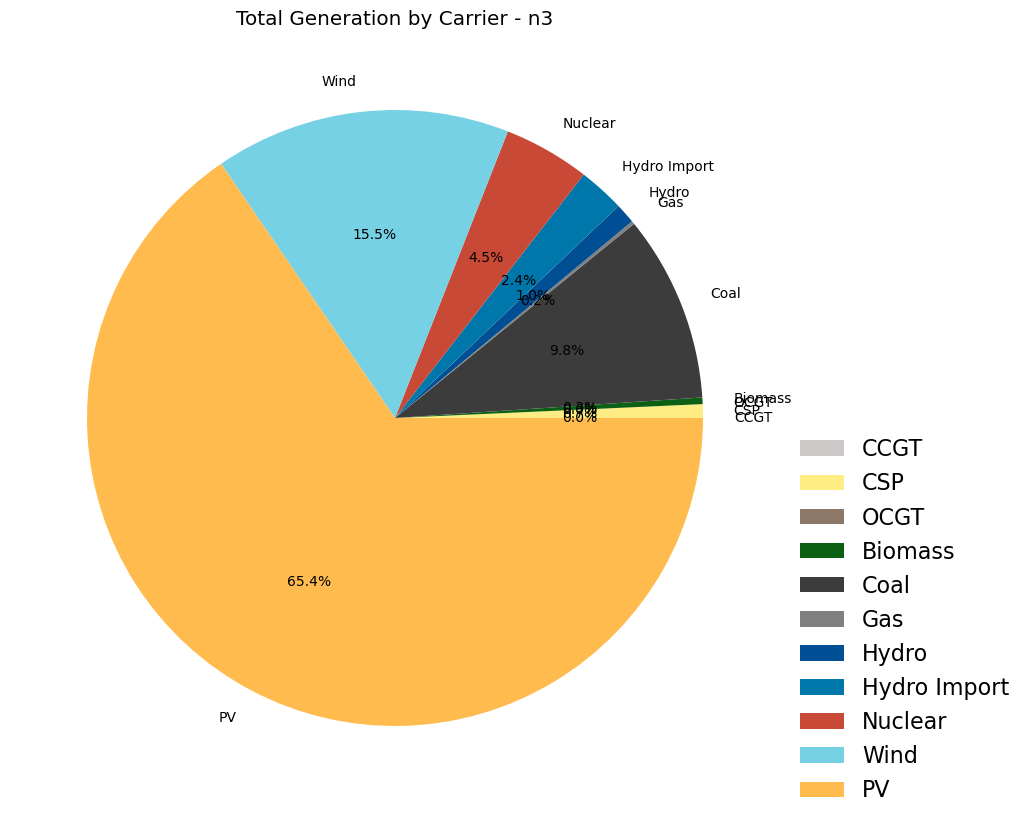

In [83]:
def plot_generation_pie_chart(network, title):
    # Group by carrier and sum p_nom, divide by 1000 to convert to GW
    carriers = network.generators_t.p.sum().groupby(network.generators.carrier).sum().div(1e3)
    
    # Filter carriers to those defined in colors
    carriers = carriers.loc[carriers.index.intersection(colors.keys())]

    # Create a pie chart of the sum of p_nom grouped by carrier
    plt.figure(figsize=(10, 10))
    plt.pie(carriers, labels=[nice_names.get(carrier, carrier) for carrier in carriers.index],
            colors=[colors[carrier] for carrier in carriers.index], radius=1, autopct='%1.1f%%')

    legend_table = []
    for carrier, value in carriers.items():
        legend_table.append([colors[carrier], f"{nice_names.get(carrier, carrier)}"])

    plt.legend(handles=[plt.Rectangle((0, 0), 2, 1, color=color, edgecolor='black', linewidth=1) for carrier, color in colors.items() if carrier in carriers.index],
               labels=[text for carrier, text in legend_table if carrier in carriers.index],
               loc='best', bbox_to_anchor=(1, 0.5), prop={'size': 16}, frameon=False)

    plt.title(title)
    plt.savefig(f'{title.replace(" ", "_").lower()}.png', transparent=True, bbox_inches='tight', dpi=800)
    plt.show()

# Plot for n0
plot_generation_pie_chart(n0, 'Total Generation by Carrier - n0')
    
# Plot for n1
plot_generation_pie_chart(n1, 'Total Generation by Carrier - n1')

# Plot for n2
plot_generation_pie_chart(n2, 'Total Generation by Carrier - n2')

# Plot for n3
plot_generation_pie_chart(n3, 'Total Generation by Carrier - n3')

In [37]:
p_by_carrier_n0

carrier,CCGT,CSP,OCGT,biomass,coal,gas,hydro,hydro-import,nuclear,onwind,solar
timestep,,,,,,,,,,,
2030-01-03 04:00:00,0.0,205.130089,0.0,132.906105,11586.332189,52.5,32.429996,1179.770756,1835.460000,4655.500979,10654.436912
2030-01-10 18:00:00,0.0,208.979532,0.0,139.740324,13614.332189,52.5,643.021167,1133.500283,1835.460000,4565.138177,8807.497784
2030-01-18 08:00:00,0.0,304.637497,0.0,137.943687,13765.124442,52.5,661.012238,1136.372282,1835.460000,4339.408359,9868.108286
2030-01-25 22:00:00,0.0,279.448939,0.0,134.163346,13276.169375,52.5,664.631125,1140.183308,1836.450158,4595.593847,9486.119371
2030-02-02 12:00:00,0.0,327.661925,0.0,69.632486,14149.691144,52.5,664.856000,1084.478623,1840.465800,4548.358368,9112.658524
2030-02-10 02:00:00,0.0,181.167884,0.0,52.161745,13217.709620,52.5,664.856000,1108.876879,1840.465800,4154.417053,10729.707277
2030-02-17 16:00:00,0.0,305.550144,0.0,89.955719,13736.393486,52.5,659.560762,1126.740379,1840.465800,4753.947972,8979.037546
2030-02-25 06:00:00,0.0,318.382715,0.0,87.230189,12805.579954,52.5,636.269665,1110.925169,1839.622332,4029.595454,10472.163782
2030-03-04 20:00:00,0.0,331.537708,0.0,116.663424,13202.641228,52.5,624.089024,697.664938,1838.797200,4786.324774,9780.200433


In [38]:
p_by_carrier_n1

carrier,CCGT,CSP,OCGT,biomass,coal,gas,hydro,hydro-import,nuclear,onwind,solar
timestep,,,,,,,,,,,
2030-01-03 04:00:00,0.0,194.873585,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1495.190349,966.219768
2030-01-10 18:00:00,0.0,198.530556,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1758.202171,788.903336
2030-01-18 08:00:00,0.0,289.405624,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1503.596903,845.790247
2030-01-25 22:00:00,0.0,265.476492,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1644.183594,820.528525
2030-02-02 12:00:00,0.0,311.278829,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1636.508014,750.463515
2030-02-10 02:00:00,0.0,172.109489,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1449.186469,932.884223
2030-02-17 16:00:00,0.0,290.272637,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1611.551731,737.200875
2030-02-25 06:00:00,0.0,302.463577,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1492.722304,945.397055
2030-03-04 20:00:00,0.0,314.960821,0.0,0.0,2208.0,52.5,0.0,0.0,927.0,1768.917618,873.277337


# 4.Storage Unit

In [39]:
def get_storage_data(network):
    storage_p_sum = network.storage_units_t.p.sum()
    storage_p_sum = storage_p_sum.loc[storage_p_sum != 0]
    
    storage_p_nom_opt = network.storage_units.p_nom_opt
    storage_p_nom_opt = storage_p_nom_opt.loc[storage_p_nom_opt != 0]

    return storage_p_sum, storage_p_nom_opt

# Get the data for each network
a0, b0 = get_storage_data(n0)
a1, b1 = get_storage_data(n1)

# Combine storage_p_sum data
storage_p_sum_combined = pd.concat([a0, a1], axis=1, keys=['n0', 'n1'])
print("Storage p sum:")
print(storage_p_sum_combined)

print("\nSums of storage p sum:")
print(storage_p_sum_combined.sum())

storage_p_nom_opt_combined = pd.concat([b0, b1], axis=1, keys=['n0', 'n1'])
print("\nStorage p_nom_opt:")
print(storage_p_nom_opt_combined)

print("\nSums of storage p_nom_opt:")
print(storage_p_nom_opt_combined.sum())

# CSV
combined_csv = pd.concat([storage_p_sum_combined, storage_p_nom_opt_combined], keys=['storage_p_sum', 'storage_p_nom_opt'])
combined_csv.to_csv('storage.csv')




Storage p sum:
                     n0  n1
StorageUnit                
Drakensberg -171.358544 NaN
Ingula      -340.999273 NaN
Palmiet      -48.552767 NaN

Sums of storage p sum:
n0   -560.910584
n1      0.000000
dtype: float64

Storage p_nom_opt:
                 n0      n1
StorageUnit                
Drakensberg  1000.0  1000.0
Ingula       1332.0  1332.0
Palmiet       400.0   400.0
Steenbras     180.0   180.0

Sums of storage p_nom_opt:
n0    2912.0
n1    2912.0
dtype: float64


# 6. Total Annual System Costs

In [20]:
objectives = {
    'n0': n0.objective / 1e9,
    'n1': n1.objective / 1e9
}

# Converting the dictionary into a DataFrame
objectives_df = pd.DataFrame(list(objectives.items()), columns=['Network', 'Objective'])

# Print or display the DataFrame
print(objectives_df)

# If you want to save it to a CSV file
objectives_df.to_csv('total_costs.csv', index=False)


  Network   Objective
0      n0  209.553389
1      n1  250.485044


In [19]:
n0.carriers.filter(like="_emissions")


,co2_emissions
Carrier,
CSP,0.0000
biomass,0.0000
PHS,0.0000
coal,0.3000
gas,0.1794
hydro,0.0000
hydro-import,0.0000
nuclear,0.0000
CCGT,0.1794


In [20]:
emission_prices = {
    'co2': 530.19,  # 30 USD/tCO2 * 17.673 ZAR/USD
    'sox': 0.0,
    'nox': 0.0,
    'hg': 0.0,
    'particulate': 0.0
}

In [29]:
def add_emission_prices(n, emission_prices={"co2": 530.19}, exclude_co2=False):
    if exclude_co2:
        emission_prices.pop("co2")
    ep = (
        pd.Series(emission_prices).rename(lambda x: x + "_emissions")
        * n.carriers.filter(like="_emissions")
    ).sum(axis=1)

    gen_ep = n.generators.carrier.map(ep) / n.generators.efficiency
    n.generators["marginal_cost"] += gen_ep
    su_ep = n.storage_units.carrier.map(ep) / n.storage_units.efficiency_dispatch
    n.storage_units["marginal_cost"] += su_ep

In [30]:
def add_emission_prices2(n, emission_prices={"co2": 530.19}, exclude_co2=False):
    if exclude_co2:
        emission_prices.pop("co2")
    ep = (
        pd.Series(emission_prices).rename(lambda x: x + "_emissions")
        * n.carriers.filter(like="_emissions")
    ).sum(axis=1)

    gen_ep = n.generators.carrier.map(ep) / n.generators.efficiency
    n.generators["marginal_cost"] -= gen_ep
    su_ep = n.storage_units.carrier.map(ep) / n.storage_units.efficiency_dispatch
    n.storage_units["marginal_cost"] -= su_ep

In [32]:
import copy

# 1. Clone your networks (deepcopy to ensure no shared references)
n0e = copy.deepcopy(n0)
n1e= copy.deepcopy(n1)
n2e = copy.deepcopy(n2)
n3e = copy.deepcopy(n3)

# 2. Apply emission prices to cloned networks
add_emission_prices(n0e)
add_emission_prices(n1e)
add_emission_prices(n2e)
add_emission_prices2(n3e)


In [36]:
def aggregate_costs(n, flatten=False, opts=None, existing_only=False):
    components = dict(
        Link=("p_nom", "p0"),
        Generator=("p_nom", "p"),
        StorageUnit=("p_nom", "p"),
        Store=("e_nom", "p"),
        Line=("s_nom", None),
        Transformer=("s_nom", None),
    )

    costs = {}
    for c, (p_nom, p_attr) in zip(
        n.iterate_components(components.keys(), skip_empty=False), components.values()
    ):
        if c.df.empty:
            continue
        if not existing_only:
            p_nom += "_opt"
        costs[(c.list_name, "capital")] = (
            (c.df[p_nom] * c.df.capital_cost).groupby(c.df.carrier).sum()
        )
        if p_attr is not None:
            p = c.pnl[p_attr].sum()
            if c.name == "StorageUnit":
                p = p.loc[p > 0]
            costs[(c.list_name, "marginal")] = (
                (p * c.df.marginal_cost).groupby(c.df.carrier).sum()
            )
    costs = pd.concat(costs)

    if flatten:
        assert opts is not None
        conv_techs = opts["conv_techs"]

        costs = costs.reset_index(level=0, drop=True)
        costs = costs["capital"].add(
            costs["marginal"].rename({t: t + " marginal" for t in conv_techs}),
            fill_value=0.0,
        )

    return costs

In [37]:
costs_df0 = aggregate_costs(n0, flatten=False, opts=None, existing_only=False)
costs_df1 = aggregate_costs(n1, flatten=False, opts=None, existing_only=False)
costs_df2 = aggregate_costs(n2, flatten=False, opts=None, existing_only=False)
costs_df3 = aggregate_costs(n3, flatten=False, opts=None, existing_only=False)

costs_df0e = aggregate_costs(n0e, flatten=False, opts=None, existing_only=False)
costs_df1e = aggregate_costs(n1e, flatten=False, opts=None, existing_only=False)
costs_df2e = aggregate_costs(n2e, flatten=False, opts=None, existing_only=False)
costs_df3e = aggregate_costs(n3e, flatten=False, opts=None, existing_only=False)

# Combine all the cost DataFrames into a single DataFrame
combined_costs = pd.concat([costs_df0, costs_df1, costs_df2, costs_df3], axis=1, keys=['n0', 'n1', 'n2', 'n3'])

combined_costs_in_millions = combined_costs / 1e6  # Convert to millions

# Convert the costs to USD using the exchange rate
combined_costs_in_usd = combined_costs_in_millions / 17.673

# Round the values to two decimal places
combined_costs_in_usd = combined_costs_in_usd.round(2)

# Print or display the formatted combined DataFrame in USD
print(combined_costs_in_usd)

# Save the formatted DataFrame to a CSV file
combined_costs_in_usd.to_csv('combined_costs_in_usd.csv')

NameError: name 'n0e' is not defined

In [38]:

# Combine all the cost DataFrames into a single DataFrame
combined_costs = pd.concat([
    costs_df0, costs_df1, costs_df2, costs_df3e,
    costs_df0e, costs_df1e, costs_df2e, costs_df3
], axis=1, keys=['n0', 'n1', 'n2', 'n3'])

combined_costs_in_millions = combined_costs / 1e6  # Convert to millions

# Convert the costs to USD using the exchange rate of 17.673
combined_costs_in_usd = combined_costs_in_millions / 17.673

# Round the values to two decimal places
combined_costs_in_usd = combined_costs_in_usd.round(2)

# Print or display the formatted combined DataFrame in USD
print(combined_costs_in_usd)

# Save the formatted DataFrame to a CSV file
combined_costs_in_usd.to_csv('combined_costs_in_usd_with_e.csv')


NameError: name 'n0e' is not defined

In [29]:
# Calculate the total costs for each scenario
total_cost0 = costs_df0.sum().sum()
total_cost1 = costs_df1.sum().sum()


total_cost0e = costs_df0e.sum().sum()
total_cost1e = costs_df1e.sum().sum()


# Print the total costs
print("Total costs for standard scenarios:")
print(total_cost0)
print(total_cost1)


print("\nTotal costs for 'e' scenarios:")
print(total_cost0e)
print(total_cost1e)




NameError: name 'costs_df0' is not defined

# 7. Marginal Price

In [32]:
bus_type_n0 = pd.Series(n0.buses.index.str[0:], n0.buses.index).replace("", "electricity")
prices_n0 = n0.buses_t.marginal_price.mean().groupby(bus_type_n0).mean()
average_price_n0 = prices_n0.mean()

bus_type_n1 = pd.Series(n1.buses.index.str[0:], n1.buses.index).replace("", "electricity")
prices_n1 = n1.buses_t.marginal_price.mean().groupby(bus_type_n1).mean()
average_price_n1 = prices_n1.mean()

bus_type_n2 = pd.Series(n3.buses.index.str[0:], n3.buses.index).replace("", "electricity")
prices_n2 = n3.buses_t.marginal_price.mean().groupby(bus_type_n2).mean()
average_price_n2 = prices_n2.mean()

bus_type_n3 = pd.Series(n3.buses.index.str[0:], n3.buses.index).replace("", "electricity")
prices_n3 = n3.buses_t.marginal_price.mean().groupby(bus_type_n3).mean()
average_price_n3 = prices_n3.mean()

print(f"Average Marginal Price for n0: {average_price_n0:.2f}  ZAR/MWh")
print(f"Average Marginal Price for n1: {average_price_n1:.2f}  ZAR/MWh")
print(f"Average Marginal Price for n2: {average_price_n2:.2f}  ZAR/MWh")
print(f"Average Marginal Price for n3: {average_price_n3:.2f}  ZAR/MWh")


Average Marginal Price for n0: 432.73  ZAR/MWh
Average Marginal Price for n1: 456.26  ZAR/MWh
Average Marginal Price for n2: 456.26  ZAR/MWh
Average Marginal Price for n3: 456.26  ZAR/MWh


In [19]:
total_electricity_n3 = n3.generators_t.p.sum().sum() /1e3 #MWh

# in Mt -> USD 30/tCO2 * 17.637 * 1000
emissioncost3 = 23.114941 *30 *17.637 * 1000

#emissions costs / total generated electricity in MWh
tax_cost = emissioncost3 / total_electricity_n3

average_price_without_tax_n3 = average_price_n3 - tax_cost
print(f"Average Marginal Price for n3 without CO2 tax: {average_price_without_tax_n3:.2f} ZAR/MWh")


Average Marginal Price for n3 without CO2 tax: 674.55 ZAR/MWh


In [20]:
# Given CO2 tax in USD/tCO2
CO2_tax = 30*17.637

# Function to calculate the price with tax
def price_with_tax(network, average_price, emissions_in_mt):
    total_electricity = network.generators_t.p.sum().sum() / 1e3 # MWh
    emission_cost = emissions_in_mt * CO2_tax * 1000 # in USD
    tax_cost = emission_cost / total_electricity
    return average_price + tax_cost

# Emissions for each network in Mt
emissions = {
    'n0': 152.005776,
    'n1': 105.508525,
    'n2': 65.172835,
    'n3': 23.114941

}

average_prices = {
    'n0': average_price_n0,
    'n1': average_price_n1,
    'n2': average_price_n2,
    'n3': average_price_n3,

}

prices_with_tax = {}
for net, avg_price in average_prices.items():
    prices_with_tax[net] = price_with_tax(eval(net), avg_price, emissions[net])

for net, price in prices_with_tax.items():
    print(f"Average Marginal Price for {net} with CO2 tax: {price:.2f} ZAR/MWh")


Average Marginal Price for n0 with CO2 tax: 832.89 ZAR/MWh
Average Marginal Price for n1 with CO2 tax: 631.62 ZAR/MWh
Average Marginal Price for n2 with CO2 tax: 842.08 ZAR/MWh
Average Marginal Price for n3 with CO2 tax: 762.14 ZAR/MWh


In [ ]:
# Your existing data dictionary:
data = {
    "Network": ["n0", "n1", "n2", "n3"],
    "Average Marginal Price Without CO2 Tax (ZAR/MWh)": [
        average_price_n0,
        average_price_n1,
        average_price_n2,
        average_price_without_tax_n3
    ]
}

# Add the average prices with tax to the data dictionary:
data["Average Marginal Price With CO2 Tax (ZAR/MWh)"] = [
    prices_with_tax.get("n0", average_price_n0),
    prices_with_tax.get("n1", average_price_n1),
    prices_with_tax.get("n2", average_price_n2),
    prices_with_tax.get("n3", average_price_n3)
]

# Convert the dictionary to a DataFrame:
df = pd.DataFrame(data)

# Save the DataFrame to a CSV:
df.to_csv("average_marginal_prices.csv", index=False)

print("Results saved in 'average_marginal_prices.csv'")


In [ ]:
df_n0 = n0.buses_t.marginal_price.reset_index()
df_n1 = n1.buses_t.marginal_price.reset_index()
df_n2 = n2.buses_t.marginal_price.reset_index()
df_n3 = n3.buses_t.marginal_price.reset_index()

# Convert the 'timestep' column to datetime type for all DataFrames
for df in [df_n0, df_n1, df_n2, df_n3]:
    df['timestep'] = pd.to_datetime(df['timestep'])

# Set 'timestep' as the index for all DataFrames
for df in [df_n0, df_n1, df_n2, df_n3]:
    df.set_index('timestep', inplace=True)

# Resample the data for daily averages for all DataFrames
df_daily_n0 = df_n0.resample('D').mean()
df_daily_n1 = df_n1.resample('D').mean()
df_daily_n2 = df_n2.resample('D').mean()
df_daily_n3 = df_n3.resample('D').mean()

# Plotting the data in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
dataframes = [df_daily_n0, df_daily_n1, df_daily_n2, df_daily_n3]
titles = ['n0', 'n1', 'n2', 'n3']

for ax, df, title in zip(axs.flat, dataframes, titles):
    df.plot(kind='line', ax=ax, legend=True, linewidth=0.5)
    ax.set_ylabel('Marginal Price in ZAR/MWh')
    ax.set_xlabel('Time')
    ax.set_title(f'Marginal Price - Network {title}')

plt.tight_layout()
plt.savefig('marginal_price_2x2.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

map_boundaries = [14, 34, -35, -22] 

# Create a custom colormap similar to the line capacity plot
custom_cmap = LinearSegmentedColormap.from_list(
    'custom', [(0, 'blue'), (0.5, 'yellow'), (1, 'red')])

fig, axs = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': ccrs.PlateCarree()})
networks = [n0, n1, n2, n3]
labels = ['n0', 'n1', 'n2', 'n3']

# Get global min and max marginal prices across all networks for consistent coloring
all_marginal_prices = [network.buses_t.marginal_price.mean() for network in networks]
global_min = min(price.min() for price in all_marginal_prices)
global_max = max(price.max() for price in all_marginal_prices)
scatter_norm = plt.Normalize(vmin=global_min, vmax=global_max)

for ax, network, label in zip(axs.flat, networks, labels):
    
    # Plot geographical features with the same appearance as in the line loading plot
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', color='white')  # Using a light grey for land, adjust as needed
    
    # Plotting buses with marginal prices using the custom colormap
    marginal_prices = network.buses_t.marginal_price.mean()
    sc = ax.scatter(network.buses['x'], network.buses['y'], c=marginal_prices, s=50, cmap=custom_cmap, edgecolors='k', linewidth=0.5, transform=ccrs.PlateCarree(), norm=scatter_norm)
    
    ax.set_title(f"Network {label}")
    ax.set_xlim(map_boundaries[0], map_boundaries[1])
    ax.set_ylim(map_boundaries[2], map_boundaries[3])
    ax.grid(True)
    
    # Colorbar for marginal prices using the custom colormap
    cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.08, shrink=0.6)
    cbar.set_label('Average Marginal Price [ZAR/MWh]')

plt.tight_layout()
plt.savefig("map_marginal_prices.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs

map_boundaries = [14, 34, -35, -22] 

fig, axs = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': ccrs.PlateCarree()})
networks = [n0, n1, n2, n3]
labels = ['n0', 'n1', 'n2', 'n3']

for ax, network, label in zip(axs.flat, networks, labels):
    
    # Plotting buses with marginal prices
    marginal_prices = network.buses_t.marginal_price.mean()
    scatter_norm = plt.Normalize(vmin=marginal_prices.min(), vmax=marginal_prices.max())
    sc = ax.scatter(network.buses['x'], network.buses['y'], c=marginal_prices, s=50, cmap='viridis', edgecolors='k', linewidth=0.5, transform=ccrs.PlateCarree(), norm=scatter_norm)
    
    ax.set_title(f"Network {label}")
    ax.set_xlim(map_boundaries[0], map_boundaries[1])
    ax.set_ylim(map_boundaries[2], map_boundaries[3])
    ax.grid(True)
    
    # Colorbar for marginal prices
    cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.08, shrink=0.6)
    cbar.set_label('Average Marginal Price [ZAR/MWh]')

plt.tight_layout()
plt.savefig("networks_marginal_prices.png")
plt.show()


# 8. CO2 Emissions

In [ ]:
#### Total CO2 emissions by the network (efficiency and fuel source)

In [18]:
networks = [n0, n1, n2, n3]

# empty DataFrame to store the results
all_emissions = pd.DataFrame()

# Loop through the networks and calculate the emissions
for idx, network in enumerate(networks):
    emissions = network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)
    e = (emissions/network.generators.efficiency*network.generators.carrier.map(network.carriers.co2_emissions)).sum()
    e_carrier = e.groupby(network.generators.carrier).sum()/1e6
    e_carrier.rename(index={'OCGT': 'gas'}, inplace=True)
    e_carrier.rename(index={'CCGT': 'gas'}, inplace=True)
    e_carrier = e_carrier.groupby('carrier').sum()
    e_carrier = e_carrier.loc[lambda x: x != 0]
    
    all_emissions[f'n{idx}'] = e_carrier

# Compute the sum of emissions for each network and append it as a new row
all_emissions.loc['sum'] = all_emissions.sum()

# Print the result
print(all_emissions)


               n0        n1        n2        n3
carrier                                        
coal     0.582170  0.078908  0.078908  0.115085
gas      0.000361  0.000361  0.000361  0.000361
sum      0.582531  0.079270  0.079270  0.115446


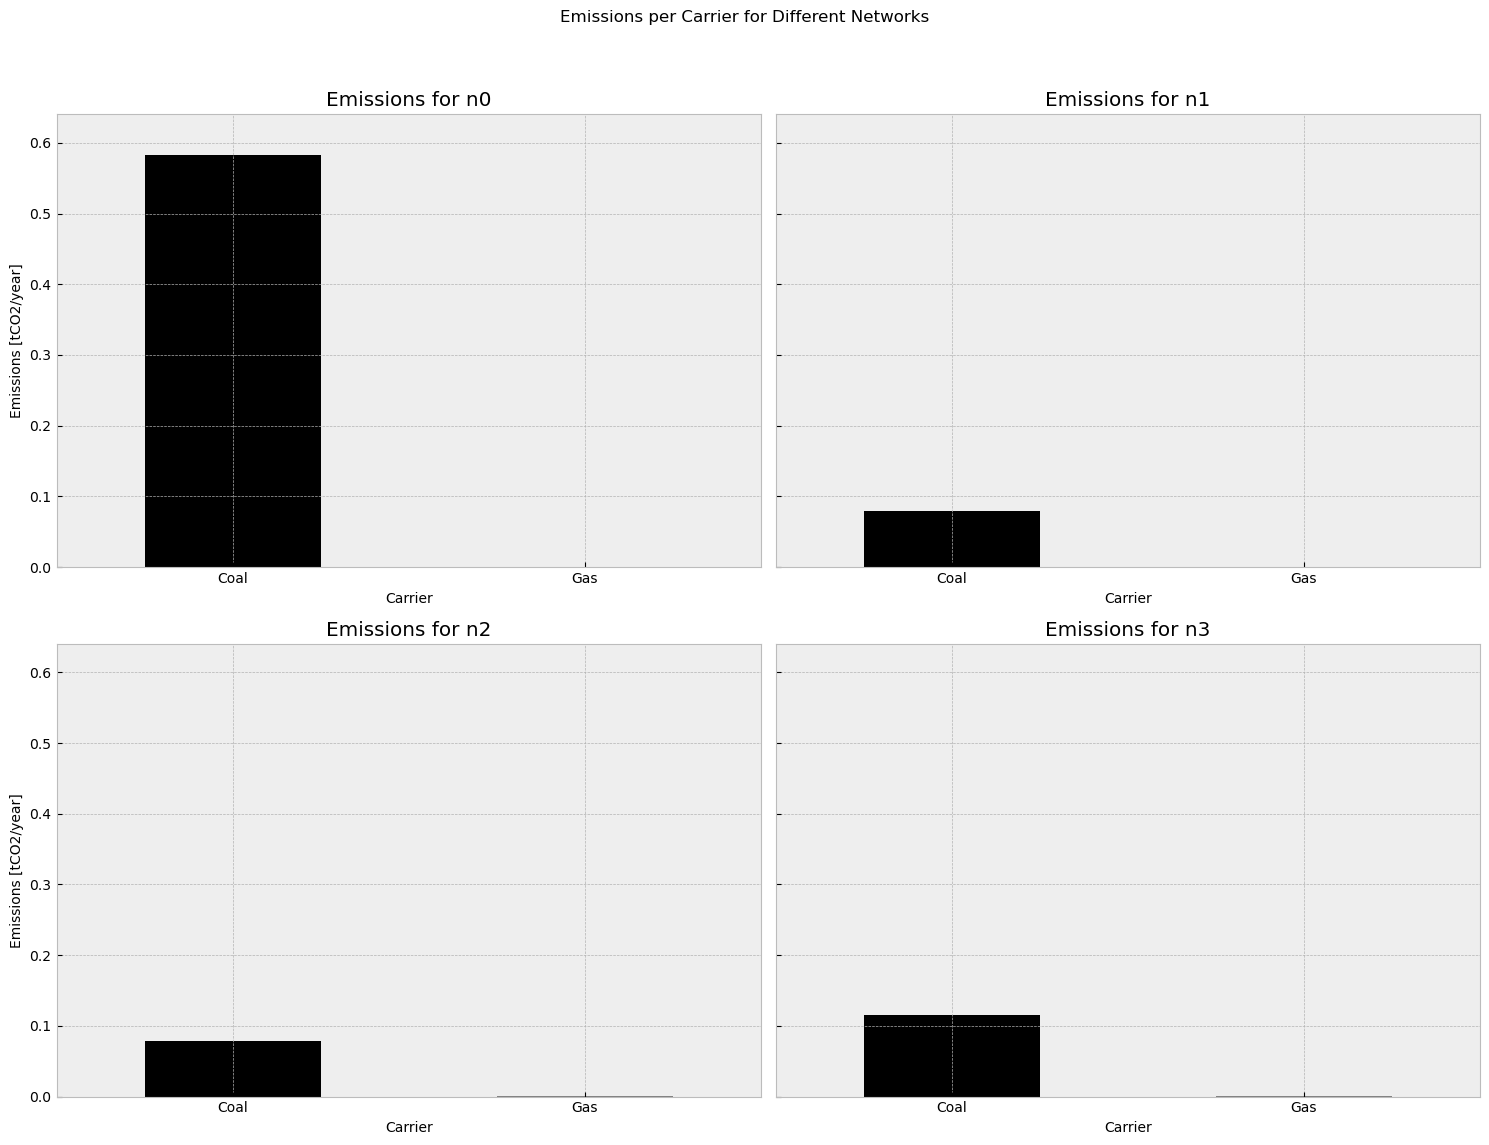

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True)
fig.suptitle('Emissions per Carrier for Different Networks')

networks = [n0, n1, n2, n3]

max_y = 0

# First, find the maximum y-value to set the same y-limit for all subplots
for network in networks:
    emissions = network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)
    e = (emissions/network.generators.efficiency*network.generators.carrier.map(network.carriers.co2_emissions)).sum()
    e_carrier = e.groupby(network.generators.carrier).sum()/1e6
    e_carrier.rename(index={'OCGT': 'gas'}, inplace=True)
    e_carrier = e_carrier.groupby('carrier').sum()
    e_carrier = e_carrier.loc[lambda x: x != 0]
    max_y = max(max_y, e_carrier.max()*1.1)

for idx, network in enumerate(networks):
    row = idx // 2
    col = idx % 2

    ax = axes[row, col]

    emissions = network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)
    e = (emissions/network.generators.efficiency*network.generators.carrier.map(network.carriers.co2_emissions)).sum()
    e_carrier = e.groupby(network.generators.carrier).sum()/1e6
    e_carrier.rename(index={'OCGT': 'gas'}, inplace=True)
    e_carrier.rename(index={'CCGT': 'gas'}, inplace=True)
    e_carrier = e_carrier.groupby('carrier').sum()
    e_carrier = e_carrier.loc[lambda x: x != 0]

    e_carrier.plot(kind="bar", ax=ax, rot=0, color=["black", "grey"])
    ax.set_xlabel("Carrier")
    ax.set_ylabel("Emissions [tCO2/year]")
    ax.set_title(f"Emissions for n{idx}")
    ax.set_ylim(0, max_y) # set the same y-limit for all subplots

    ax.set_xticklabels([nice_names.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()], fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout to make sure the titles fit well
plt.savefig("emissions_per_carrier_combined.png")
plt.show()


In [ ]:
#### Plot total CO2 emissions per day

In [ ]:
# List of networks
networks = [n0, n1, n2, n3]

# Create a subplot with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.flatten()  # Flatten the 2x2 grid to access the axes easily

for idx, network in enumerate(networks):
    # Calculate emissions
    emissions = (network.generators_t.p / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions)).sum(axis=1)
    emissions = emissions.droplevel(level='period')
    emissions = emissions.resample("D").sum()/1e3
    
    # Plot emissions for this network
    emissions.plot(ax=axes[idx], title=f'Change in CO2 Emissions over Time for n{idx}',
                   xlabel='Time (daily)', ylabel='CO2 Emissions in Mt')

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig("emissions_all_networks.png")

# Show plot
plt.show()
